In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [177]:
fig_height = 5
fig_width = 8

In [178]:
def missing(df):
    df_missing = pd.DataFrame(df.isna().sum().sort_values(ascending = False), columns = ['missing_count'])
    df_missing['missing_percentage'] = df_missing.missing_count / len(df)
    return df_missing

In [179]:
# import the data
df = pd.read_csv("../../data/real_estate.csv")
df.head()

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
0,For rent,Purvciems,Dzelzavas 93,1,27.0,3.0,5.0,LT proj.,Brick-Panel,All amenities,250.0,56.955484,24.202139
1,For rent,Ziepniekkalns,Ozolciema 32,2,50.0,7.0,9.0,602.,Panel,All amenities,300.0,56.899798,24.098350
2,For sale,centrs,Ieroču 6,2,33.0,1.0,2.0,P. kara,Wood,Partial amenities,13500.0,56.975092,24.139884
3,For sale,Ķengarags,Maskavas 305,2,50.0,5.0,5.0,LT proj.,Panel,All amenities,34000.0,56.859788,24.308342
4,For rent,Teika,Zemgala gatve 80,3,76.0,3.0,12.0,Jaun.,Masonry,All amenities,490.0,56.977745,24.166042


In [180]:
# get information about missing data
missing(df)

,missing_count,missing_percentage
price,470,0.100235
street,452,0.096396
house_type,450,0.095969
house_seria,442,0.094263
condition,406,0.086586
area,364,0.077628
total_floors,344,0.073363
floor,333,0.071017
lat,207,0.044146
lon,207,0.044146


In [181]:
# get houses without price information
df[df.price.isna()]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
42,Buying,Pļavnieki,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
48,Buying,Ķengarags,NaN,2,NaN,12.0,7.0,NaN,NaN,All amenities,NaN,46.314475,11.048029
49,Buying,Vecmīlgrāvis,NaN,NaN,9.0,99.0,9.0,NaN,NaN,NaN,NaN,46.314475,11.048029
51,Buying,Pļavnieki,NaN,Citi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
80,Renting,Āgenskalns,NaN,4,NaN,NaN,NaN,NaN,NaN,All amenities,NaN,46.314475,11.048029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Buying,Ķengarags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
4650,Renting,Ziepniekkalns,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
4664,Renting,Ķengarags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029
4665,Renting,Imanta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.314475,11.048029


In [182]:
# remove houses that do not have price information
df_all = df[~df.price.isna()].reset_index(drop = True).copy()
df_all.shape

(4219, 13)

In [183]:
# check missing information again after removing houses without the price information
missing(df_all) 

,missing_count,missing_percentage
lat,206,0.048827
lon,206,0.048827
total_floors,6,0.001422
street,5,0.001185
house_type,4,0.000948
district,3,0.000711
area,3,0.000711
floor,3,0.000711
house_seria,3,0.000711
rooms,1,0.000237


This filtering got rid of many other missing values as well. Now, none of the variables has share of missing higher than 5% so all of them are worth to explore.

In [184]:
# check data types of the variables
df_all.dtypes

op_type          object
district         object
street           object
rooms            object
area            float64
floor           float64
total_floors    float64
house_seria      object
house_type       object
condition        object
price           float64
lat             float64
lon             float64
dtype: object

In [185]:
# get descriptive statistics about each variable
df_all.describe()

,area,floor,total_floors,price,lat,lon
count,4216.000000,4216.000000,4213.000000,4219.000000,4013.000000,4013.000000
mean,61.990088,3.595114,6.034180,58728.706803,56.888532,23.550595
std,35.795856,2.515898,3.548507,76252.501519,0.773243,8.144936
min,5.000000,1.000000,1.000000,5.000000,46.314475,-100.708194
25%,40.000000,2.000000,5.000000,450.000000,56.943222,24.095453
50%,53.050000,3.000000,5.000000,40000.000000,56.954831,24.127139
75%,76.000000,5.000000,7.000000,82000.000000,56.965045,24.173175
max,427.000000,24.000000,30.000000,830000.000000,59.347471,24.340866


In [186]:
print('Number of observations:', len(df_all), '\n')
print('Unique values:')
print(df_all.nunique().sort_values(ascending = False))

Number of observations: 4219 

Unique values:
street          2527
lon             2089
lat             2087
price           1055
area             331
district          48
total_floors      25
floor             22
house_seria       15
rooms              7
house_type         6
op_type            5
condition          3
dtype: int64


In [187]:
df_all[df_all.street.isna()]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
622,Renting,Imanta,NaN,2,NaN,NaN,NaN,Jaun.,NaN,All amenities,500.0,46.314475,11.048029
791,Renting,centrs,NaN,3,70.0,2.0,NaN,NaN,NaN,NaN,900.0,46.314475,11.048029
1068,Renting,Purvciems,NaN,3,65.0,NaN,NaN,NaN,NaN,All amenities,350.0,46.314475,11.048029
2089,Renting,centrs,NaN,1,NaN,2.0,NaN,NaN,NaN,All amenities,400.0,46.314475,11.048029
2673,Change,NaN,NaN,5,190.0,NaN,NaN,Priv. m.,Brick,All amenities,29900.0,46.314475,11.048029


### Data cleaning

In [188]:
df_all[df_all.street.isna()]

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
622,Renting,Imanta,NaN,2,NaN,NaN,NaN,Jaun.,NaN,All amenities,500.0,46.314475,11.048029
791,Renting,centrs,NaN,3,70.0,2.0,NaN,NaN,NaN,NaN,900.0,46.314475,11.048029
1068,Renting,Purvciems,NaN,3,65.0,NaN,NaN,NaN,NaN,All amenities,350.0,46.314475,11.048029
2089,Renting,centrs,NaN,1,NaN,2.0,NaN,NaN,NaN,All amenities,400.0,46.314475,11.048029
2673,Change,NaN,NaN,5,190.0,NaN,NaN,Priv. m.,Brick,All amenities,29900.0,46.314475,11.048029


In [189]:
df_all = df_all.drop(df_all[df_all.street.isna()].index).reset_index(drop = True)
print(df_all.shape)
missing(df_all) 

(4214, 13)


,missing_count,missing_percentage
lat,206,0.048885
lon,206,0.048885
district,2,0.000475
rooms,1,0.000237
area,1,0.000237
total_floors,1,0.000237
op_type,0,0.000000
street,0,0.000000
floor,0,0.000000
house_seria,0,0.000000


In [201]:
# save the results
out_file_name = 'real_estate_filtered.csv'
df_all.to_csv(out_file_name, index = False)
import os
os.getcwd()

'/Users/xdu4/Documents/Duxiuxia/source_code_repository/github_duxiuxia-bioinformatics/teach_machine_learning/src/regression'

Text(0.5, 1.0, 'histogram of price')

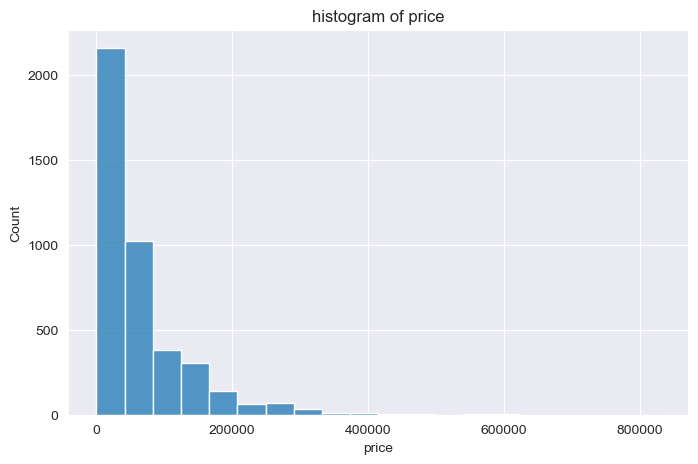

In [191]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.histplot(data=df_all, x='price', bins=20, ax=ax)
ax.set_title('histogram of price')

Text(0.5, 1.0, 'histogram of price (log2)')

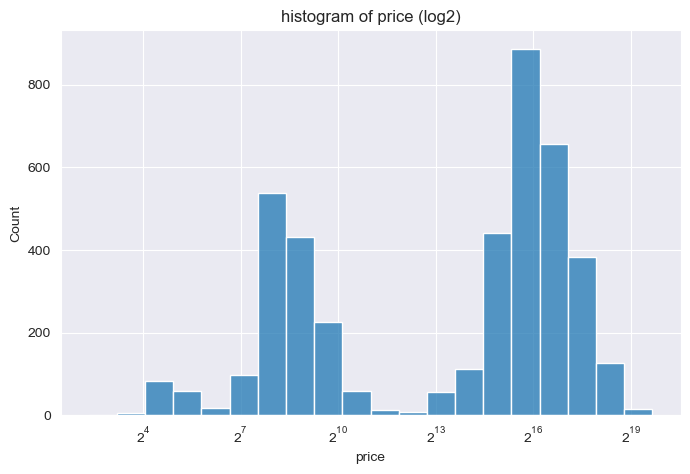

In [192]:
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.histplot(data=df_all, x='price', bins=20, log_scale=True, ax=ax)
ax.set_xscale('log', base=2)
ax.set_title('histogram of price (log2)')

Text(0.5, 1.0, 'histogram of the for sale house price (log)')

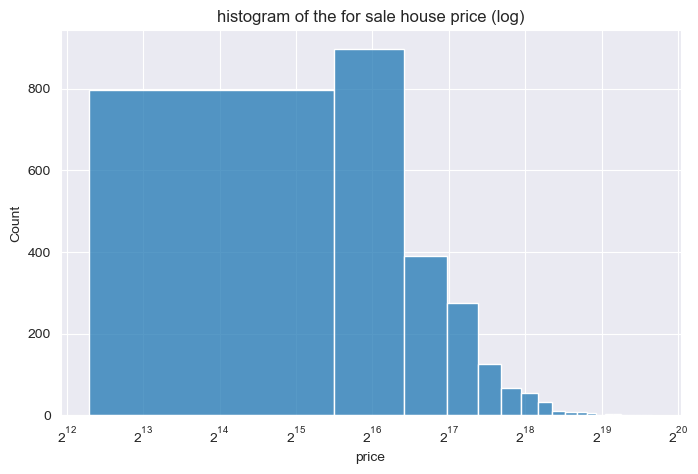

In [193]:
tf = df_all['op_type'] == 'For sale'
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.histplot(data=df_all.loc[tf, :], x='price', bins=20, ax=ax) 
ax.set_xscale('log', base=2)
ax.set_title('histogram of the for sale house price (log)')

Text(0.5, 1.0, 'histogram of the for rent house price (log)')

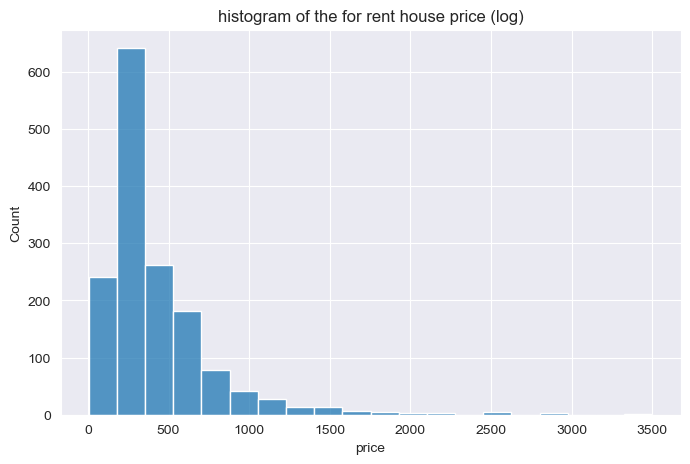

In [194]:
tf = df_all['op_type'] == 'For rent'
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.histplot(data=df_all.loc[tf, :], x = 'price', bins = 20, ax=ax)
ax.set_title('histogram of the for rent house price (log)')

Text(0.5, 1.0, 'price vs. area')

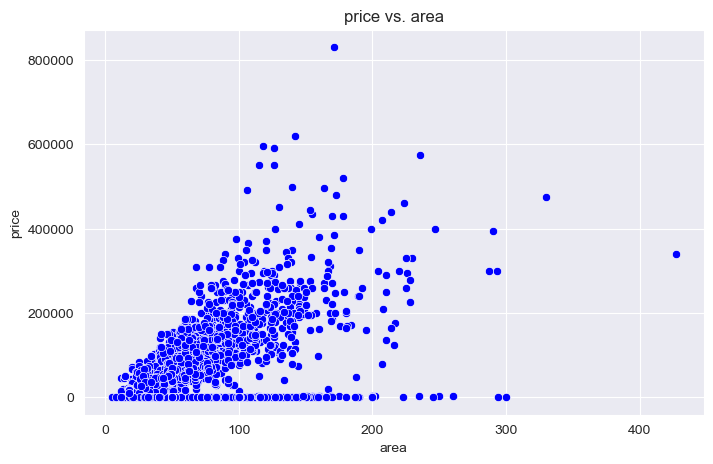

In [195]:
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.scatterplot(data=df_all, x='area', y='price', c='b', ax=ax)
ax.set_title('price vs. area')

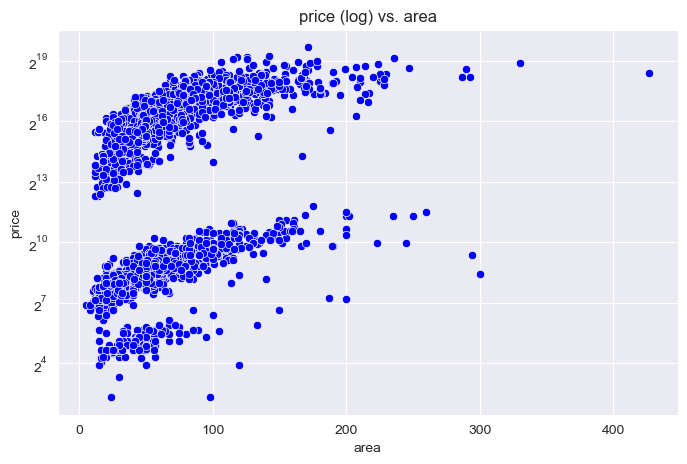

In [196]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_all, x='area', y='price', c='b', ax=ax)
ax.set_title('price (log) vs. area')
ax.set_yscale('log', base=2)

Text(0.5, 1.0, 'For sale price vs. area')

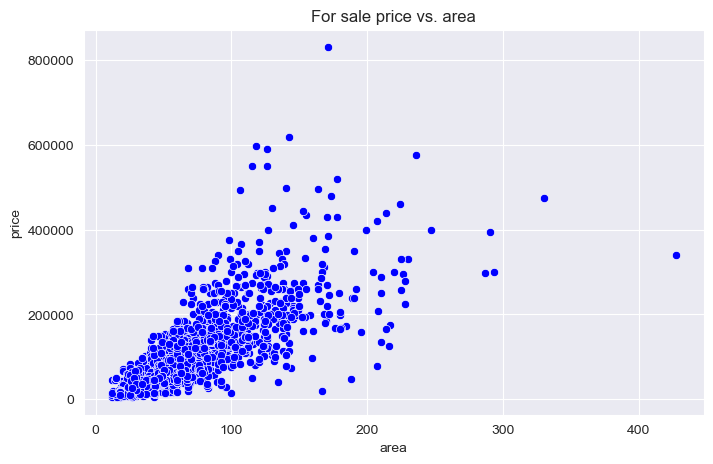

In [197]:
tf = df_all['op_type'] == 'For sale'
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.scatterplot(data=df_all.loc[tf, :], x='area', y='price', c = 'b', ax=ax)
ax.set_title('For sale price vs. area')

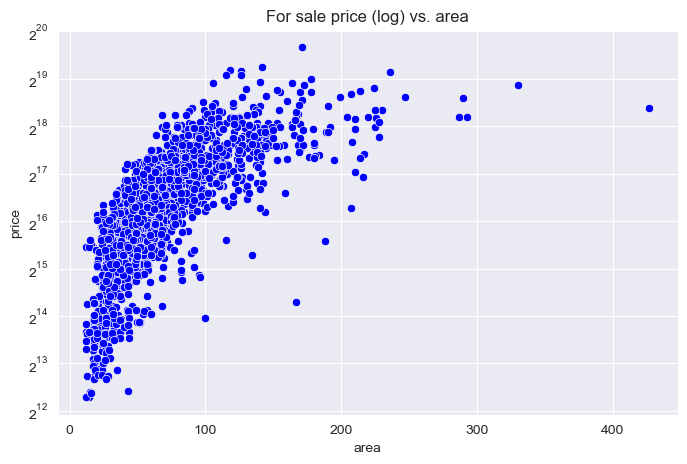

In [198]:
tf = df_all['op_type'] == 'For sale'
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.scatterplot(data=df_all.loc[tf, :], x='area', y='price', c='b', ax=ax)
ax.set_title('For sale price (log) vs. area')
ax.set_yscale('log', base=2)

Text(0.5, 1.0, 'For rent price vs. area')

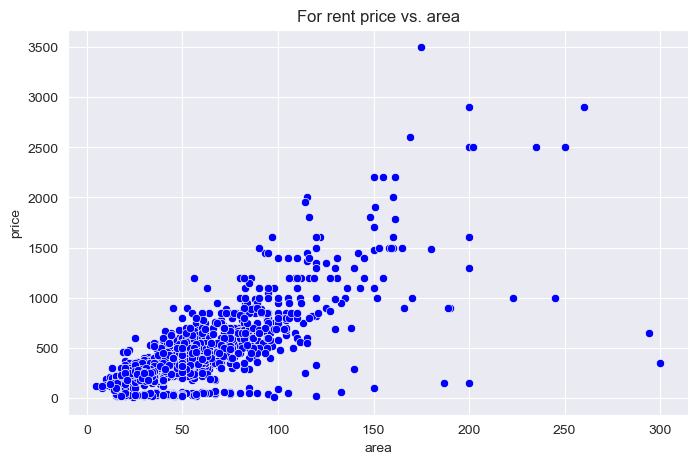

In [199]:
tf = df_all['op_type'] == 'For rent'
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.scatterplot(data=df_all.loc[tf, :], x='area', y='price', c='b', ax=ax)
ax.set_title('For rent price vs. area')

Text(0.5, 1.0, 'Rent price (log) vs. area')

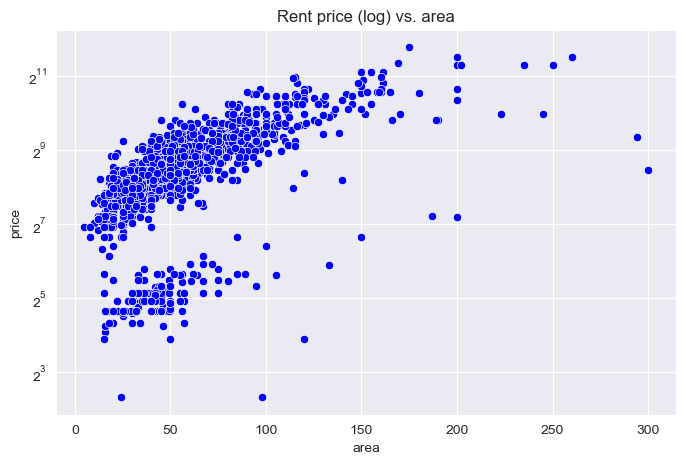

In [200]:
tf = df_all['op_type'] == 'For rent'
fig, ax = plt.subplots(figsize = (fig_width, fig_height))
sns.scatterplot(data=df_all.loc[tf, :], x='area', y='price', c='b', ax=ax)
ax.set_yscale('log', base=2)
ax.set_title('Rent price (log) vs. area')